##Importation of Libraries

In [56]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import datetime as dt
from time import gmtime, strftime
pd.options.display.max_rows = 20
import numpy as np

In [57]:
# loading the GDP data set as Pandas dataframe
filename = os.path.join(os.getcwd(), 'GDP current US$.xls')

gdp_data = pd.read_excel(filename)
gdp_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1.083240e+09,1.245810e+09,1.320670e+09,1.379888e+09,1.531844e+09,1.665363e+09,...,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.429264e+11,2.396107e+11,2.703272e+11,2.694908e+11,2.834462e+11,2.666523e+11,...,9.859871e+11,1.006526e+12,9.273485e+11,8.851764e+11,1.021043e+12,1.007196e+12,1.000834e+12,9.275933e+11,1.081998e+12,1.169484e+12
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.056449e+10,2.055058e+10,1.999814e+10,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,9.927218e+10,8.663640e+10,1.086909e+11,1.262873e+11,1.276024e+11,1.306781e+11,...,8.339481e+11,8.943225e+11,7.686447e+11,6.913634e+11,6.848988e+11,7.670257e+11,8.225384e+11,7.864600e+11,8.444597e+11,8.778633e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1.105194e+10,3.390500e+09,5.561222e+09,7.526964e+09,7.648377e+09,6.506230e+09,...,1.334016e+11,1.372444e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.024137e+10,6.568544e+10,1.067136e+11


In [58]:
#unpivoting the GDP data to prepate it for the 
gdp_data_unpivot = pd.melt(gdp_data, id_vars='Country Code', value_vars=['1993', '1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'], var_name='Year', value_name='GDP')
gdp_data_unpivot.head()

,Country Code,Year,GDP
0,ABW,1993,1.083240e+09
1,AFE,1993,2.429264e+11
2,AFG,1993,NaN
3,AFW,1993,9.927218e+10
4,AGO,1993,1.105194e+10


In [59]:
gdp_data_unpivot['GDP'] = gdp_data_unpivot.groupby('Country Code')['GDP'].transform(lambda x: x.fillna(x.ffill()))
gdp_data_unpivot.head()

,Country Code,Year,GDP
0,ABW,1993,1.083240e+09
1,AFE,1993,2.429264e+11
2,AFG,1993,NaN
3,AFW,1993,9.927218e+10
4,AGO,1993,1.105194e+10


In [60]:
filename2 = os.path.join(os.getcwd(), 'Combined rates.xlsx')

teacher_data = pd.read_excel(filename2)
teacher_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Trained teachers in lower secondary education ...,SE.SEC.TCAQ.LO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Trained teachers in lower secondary education ...,SE.SEC.TCAQ.LO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Trained teachers in lower secondary education ...,SE.SEC.TCAQ.LO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Trained teachers in lower secondary education ...,SE.SEC.TCAQ.LO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,55.356979,57.598701,59.444271,62.762901,61.95126,63.041729,62.65406,NaN,NaN,NaN
4,Angola,AGO,Trained teachers in lower secondary education ...,SE.SEC.TCAQ.LO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,53.525280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
teacher_data_unpivot = pd.melt(teacher_data, id_vars='Country Code', value_vars=['1993', '1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'], var_name='Year', value_name='Rate')
teacher_data_unpivot.head()

,Country Code,Year,Rate
0,ABW,1993,NaN
1,AFE,1993,NaN
2,AFG,1993,NaN
3,AFW,1993,NaN
4,AGO,1993,NaN


In [62]:
teacher_data_unpivot['Rate'] = teacher_data_unpivot.groupby('Country Code')['Rate'].transform(lambda x: x.fillna(x.ffill()))
teacher_data_unpivot.tail(5)

,Country Code,Year,Rate
39895,XKX,2022,NaN
39896,YEM,2022,94.551743
39897,ZAF,2022,100.000000
39898,ZMB,2022,98.750298
39899,ZWE,2022,97.620209


In [63]:
filename3 = os.path.join(os.getcwd(), 'Government expenditure on education, total % of GDP.xls')

teacher_expend_data = pd.read_excel(filename3)
teacher_expend_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,4.76316,...,6.44277,5.85084,5.88783,5.491060,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.127174,0.234451,0.270662,4.352440,4.632255,3.906225
2,Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.45446,3.69522,3.25580,4.543970,4.343190,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.403950,3.282970,2.928443
4,Angola,AGO,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,2.56712,...,3.87000,2.93000,3.10000,2.754937,2.466879,2.044701,2.073064,2.744997,2.297109,2.332126


In [64]:
teacher_expend_data_unpivot = pd.melt(teacher_expend_data, id_vars='Country Code', value_vars=['1993', '1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'], var_name='Year', value_name='Expenditure')
teacher_expend_data_unpivot.head()

,Country Code,Year,Expenditure
0,ABW,1993,NaN
1,AFE,1993,NaN
2,AFG,1993,NaN
3,AFW,1993,NaN
4,AGO,1993,NaN


In [65]:
teacher_expend_data_unpivot['Expenditure'] = teacher_expend_data_unpivot.groupby('Country Code')['Expenditure'].transform(lambda x: x.fillna(x.mean()))
teacher_expend_data_unpivot.head(5)

,Country Code,Year,Expenditure
0,ABW,1993,5.325764
1,AFE,1993,2.253868
2,AFG,1993,3.907689
3,AFW,1993,3.205121
4,AGO,1993,2.714070


In [66]:
merge1 = pd.merge(gdp_data_unpivot, teacher_data_unpivot,  how='left', left_on=['Country Code','Year'], right_on = ['Country Code','Year'])
merge1.tail(15)

,Country Code,Year,GDP,Rate
39885,ZAF,2022,4.058697e+11,100.000000
39886,ZAF,2022,4.058697e+11,100.000000
39887,ZAF,2022,4.058697e+11,100.000000
39888,ZAF,2022,4.058697e+11,100.000000
39889,ZAF,2022,4.058697e+11,100.000000
39890,ZMB,2022,2.978445e+10,98.750298
39891,ZMB,2022,2.978445e+10,98.750298
39892,ZMB,2022,2.978445e+10,98.750298
39893,ZMB,2022,2.978445e+10,98.750298
39894,ZMB,2022,2.978445e+10,98.750298


In [67]:
merge2 = pd.merge(merge1, teacher_expend_data_unpivot,  how='left', left_on=['Country Code','Year'], right_on = ['Country Code','Year'])
merge2.tail(5)

,Country Code,Year,GDP,Rate,Expenditure
39895,ZWE,2022,2.067806e+10,97.620209,9.62871
39896,ZWE,2022,2.067806e+10,97.620209,9.62871
39897,ZWE,2022,2.067806e+10,97.620209,9.62871
39898,ZWE,2022,2.067806e+10,97.620209,9.62871
39899,ZWE,2022,2.067806e+10,97.620209,9.62871


In [68]:
filename4 = os.path.join(os.getcwd(), 'country-coord.csv')

coord_data = pd.read_csv(filename4)
coord_data.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,AF,AFG,4,33.0000,65.0
1,Albania,AL,ALB,8,41.0000,20.0
2,Algeria,DZ,DZA,12,28.0000,3.0
3,American Samoa,AS,ASM,16,-14.3333,-170.0
4,Andorra,AD,AND,20,42.5000,1.6


In [69]:
merge3 = pd.merge(merge2, coord_data,  how='left', left_on=['Country Code'], right_on = ['Alpha-3 code'])
merge3.head()

,Country Code,Year,GDP,Rate,Expenditure,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,ABW,1993,1.083240e+09,NaN,5.325764,Aruba,AW,ABW,533.0,12.5,-69.9667
1,ABW,1993,1.083240e+09,NaN,5.325764,Aruba,AW,ABW,533.0,12.5,-69.9667
2,ABW,1993,1.083240e+09,NaN,5.325764,Aruba,AW,ABW,533.0,12.5,-69.9667
3,ABW,1993,1.083240e+09,NaN,5.325764,Aruba,AW,ABW,533.0,12.5,-69.9667
4,ABW,1993,1.083240e+09,NaN,5.325764,Aruba,AW,ABW,533.0,12.5,-69.9667


In [70]:
merge3['Value'] = merge3['GDP'] * (merge3['Expenditure']/100)

In [71]:
african_countries = [
    "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso",
    "Burundi", "Cabo Verde", "Cameroon", "Central African Republic", 
    "Chad", "Comoros", "Democratic Republic of the Congo", "Djibouti", 
    "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia",
    "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Ivory Coast", 
    "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali", 
    "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", 
    "Nigeria", "Republic of the Congo", "Rwanda", "Sao Tome and Principe", 
    "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", 
    "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", 
    "Zambia", "Zimbabwe"
]

merge3 = merge3[merge3['Country'].isin(african_countries)]

In [72]:
merge3 = merge3.drop_duplicates(subset=['Country Code', 'Year'], keep='first')
merge3=merge3.dropna(axis=0)

In [73]:
merge3.head()
#merge3.to_excel(r'/Users/tinashe/Downloads/File Name.xlsx', index=False)

,Country Code,Year,GDP,Rate,Expenditure,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average),Value
7970,ZMB,1998,3.537742e+09,81.957123,2.118230,Zambia,ZM,ZMB,894.0,-15.0000,30.00,7.493751e+07
8145,BWA,1999,5.484263e+09,81.763588,8.695944,Botswana,BW,BWA,72.0,-22.0000,24.00,4.769085e+08
8325,ERI,1999,6.889185e+08,37.748341,5.262810,Eritrea,ER,ERI,232.0,15.0000,39.00,3.625647e+07
8395,GHA,1999,7.718111e+09,83.650032,4.110370,Ghana,GH,GHA,288.0,8.0000,-2.00,3.172429e+08
8815,MUS,1999,4.343709e+09,100.000000,3.939760,Mauritius,MU,MUS,480.0,-20.2833,57.55,1.711317e+08


In [74]:
#merge3=merge3.query('Country == "Sierra Leone"')

In [75]:
merge3.head(10)

,Country Code,Year,GDP,Rate,Expenditure,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average),Value
7970,ZMB,1998,3.537742e+09,81.957123,2.118230,Zambia,ZM,ZMB,894.0,-15.0000,30.0000,7.493751e+07
8145,BWA,1999,5.484263e+09,81.763588,8.695944,Botswana,BW,BWA,72.0,-22.0000,24.0000,4.769085e+08
8325,ERI,1999,6.889185e+08,37.748341,5.262810,Eritrea,ER,ERI,232.0,15.0000,39.0000,3.625647e+07
8395,GHA,1999,7.718111e+09,83.650032,4.110370,Ghana,GH,GHA,288.0,8.0000,-2.0000,3.172429e+08
8815,MUS,1999,4.343709e+09,100.000000,3.939760,Mauritius,MU,MUS,480.0,-20.2833,57.5500,1.711317e+08
9110,SYC,1999,6.628386e+08,87.567574,4.944680,Seychelles,SC,SYC,690.0,-4.5833,55.6667,3.277525e+07
9300,ZMB,1999,3.404285e+09,94.152977,1.774950,Zambia,ZM,ZMB,894.0,-15.0000,30.0000,6.042435e+07
9305,ZWE,1999,6.858013e+09,79.287514,9.628710,Zimbabwe,ZW,ZWE,716.0,-20.0000,30.0000,6.603382e+08
9400,BEN,2000,3.519991e+09,39.213951,2.113660,Benin,BJ,BEN,204.0,9.5000,2.2500,7.440065e+07
9475,BWA,2000,5.788330e+09,83.796051,8.695944,Botswana,BW,BWA,72.0,-22.0000,24.0000,5.033499e+08


#### Exploratory Data Analytics

                GDP        Rate  Expenditure  Numeric code  \
count  8.470000e+02  847.000000   847.000000    847.000000   
mean   3.144202e+10   70.617959     4.118479    456.338843   
std    6.877100e+10   23.396618     2.117834    247.184969   
min    1.020858e+08   11.185010     0.127174     12.000000   
25%    2.592188e+09   52.423851     2.619680    232.000000   
50%    9.990357e+09   74.514717     3.567760    466.000000   
75%    2.009053e+10   92.441227     5.149403    690.000000   
max    4.767477e+11  100.000000    13.219570    894.000000   

       Latitude (average)  Longitude (average)         Value  
count          847.000000           847.000000  8.470000e+02  
mean             2.106122            17.711414  1.506133e+09  
std             15.564681            20.996297  3.680060e+09  
min            -29.500000           -16.566700  3.314653e+06  
25%            -12.166700            -2.000000  8.793579e+07  
50%              7.000000            21.000000  3.017999e+08  


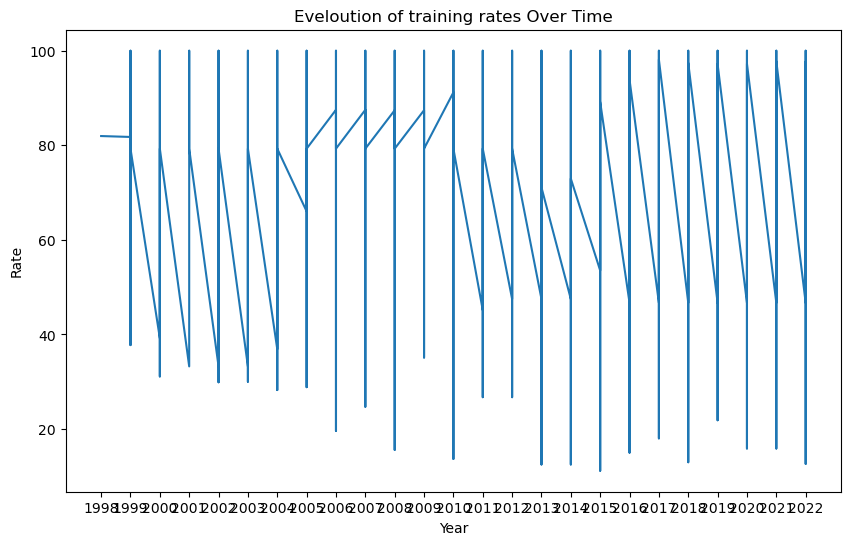

In [76]:
# Basic statistics
print(merge3.describe())

# Plot the training rates over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(merge3['Year'], merge3['Rate'])
plt.title('Eveloution of training rates Over Time')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.show()

Predicted cost for 100% coverage: $2699146415.11


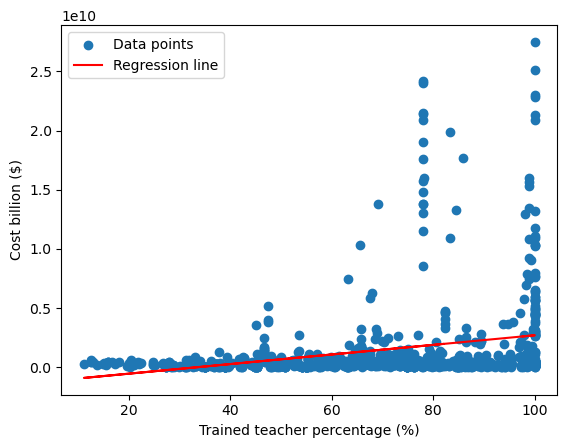

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data: Coverage vs. Cost
coverage = merge3['Rate'].to_numpy()  # Coverage in percentage
cost = merge3['Value'].to_numpy()  # Cost in dollars

# Reshape the arrays
coverage = coverage.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()
model.fit(coverage, cost)

# Predict the cost for 100% coverage
predicted_cost = model.predict([[100]])

print(f"Predicted cost for 100% coverage: ${predicted_cost[0]:.2f}")

# Plot the data and regression line
plt.scatter(coverage, cost, label='Data points')
plt.plot(coverage, model.predict(coverage), color='red', label='Regression line')
plt.xlabel('Trained teacher percentage (%)')
plt.ylabel('Cost billion ($)')
plt.legend()
plt.show()

In [78]:
r_sq = model.score(coverage, cost)
print(f"coefficient of determination: {r_sq}")


coefficient of determination: 0.0666381530254826


In [79]:
print(f"intercept: {model.intercept_}")


print(f"slope: {model.coef_}")

intercept: -1361202238.1897306
slope: [40603486.5330349]


In [80]:
filename5 = os.path.join(os.getcwd(), 'Projected Funding.xls')

projected_data = pd.read_excel(filename5)
projected_data.head()

,Africa,Projected Funding
0,Angola,6.783870e+09
1,Benin,2.539351e+08
2,Botswana,1.255296e+09
3,Burkina Faso,2.924433e+08
4,Burundi,1.407464e+08


In [81]:
merge4 = pd.merge(merge3, projected_data,  how='left', left_on=['Country'], right_on = ['Africa'])
merge4=merge4.dropna(axis=0)
merge4.tail()

,Country Code,Year,GDP,Rate,Expenditure,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average),Value,Africa,Projected Funding
841,TGO,2022,8.126439e+09,27.696320,3.798119,Togo,TG,TGO,768.0,8.0,1.1667,3.086519e+08,Togo,2.698084e+08
843,UGA,2022,4.555920e+10,79.585793,2.561050,Uganda,UG,UGA,800.0,1.0,32.0000,1.166794e+09,Uganda,6.432341e+08
844,ZAF,2022,4.058697e+11,100.000000,6.183480,South Africa,ZA,ZAF,710.0,-29.0,24.0000,2.509687e+10,South Africa,2.455745e+10
845,ZMB,2022,2.978445e+10,98.750298,3.582595,Zambia,ZM,ZMB,894.0,-15.0,30.0000,1.067056e+09,Zambia,5.753019e+08
846,ZWE,2022,2.067806e+10,97.620209,9.628710,Zimbabwe,ZW,ZWE,716.0,-20.0,30.0000,1.991030e+09,Zimbabwe,1.903816e+09


In [82]:
#from babel.numbers import format_currency

#merge4["GDP"] = merge4["GDP"].apply(lambda x: format_currency(x, currency="USD", locale="en_US"))
#merge4["Value"] = merge4["Value"].apply(lambda x: format_currency(x, currency="USD", locale="en_US"))
#merge4["Projected Funding"] = merge4["Projected Funding"].apply(lambda x: format_currency(x, currency="USD", locale="en_US"))


In [83]:
merge4.head()

,Country Code,Year,GDP,Rate,Expenditure,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average),Value,Africa,Projected Funding
0,ZMB,1998,3.537742e+09,81.957123,2.118230,Zambia,ZM,ZMB,894.0,-15.0000,30.00,7.493751e+07,Zambia,5.753019e+08
1,BWA,1999,5.484263e+09,81.763588,8.695944,Botswana,BW,BWA,72.0,-22.0000,24.00,4.769085e+08,Botswana,1.255296e+09
2,ERI,1999,6.889185e+08,37.748341,5.262810,Eritrea,ER,ERI,232.0,15.0000,39.00,3.625647e+07,Eritrea,8.356660e+07
3,GHA,1999,7.718111e+09,83.650032,4.110370,Ghana,GH,GHA,288.0,8.0000,-2.00,3.172429e+08,Ghana,4.404855e+08
4,MUS,1999,4.343709e+09,100.000000,3.939760,Mauritius,MU,MUS,480.0,-20.2833,57.55,1.711317e+08,Mauritius,2.954187e+08


In [85]:
merge4.to_excel(r'/Users/tinashe/Downloads/Projection Data.xlsx', index=False)